In [74]:
import numpy as np
import matplotlib.pyplot as plt

In [92]:
def LeastSquares(x_arr, y_arr): # returns [k, b, sigma_k, sigma b]
    v = x_arr
    u = y_arr

    N = len(v)

    mu = np.mean(u) # средее
    mv = np.mean(v)
    mv2 = np.mean([v_i**2 for v_i in v]) # средний квадрат
    mu2 = np.mean([u_i**2 for u_i in u])
    muv = np.mean ([u[i] * v[i] for i in range(len(u))]) # среднее от произведения
    k = (muv - mu * mv) / (mv2 - mv**2)
    b = mu - k * mv

    sigma_k = np.sqrt(1/(N-2) * ( (mu2 - mu**2)/(mv2 - mv**2) - k**2 ) )
    sigma_b = sigma_k * np.sqrt(mv2)

    return (k, b, sigma_k, sigma_b)

In [75]:
def cvt_P(manom):
    return 0.2 * 9.81 * manom

Оценка диаметра иглы по формуле лапласа

In [76]:
sigma_spirt = 22.78 * 1e-3

In [77]:
# показания манометра при пробулькивании в спирте (открыт нижний кран)
manom_spirt = [42, 41, ]
p_spirt     = [0.2 * 9.81 * i for i in manom_spirt]
r_igla      = [2 * sigma_spirt / delta_p for delta_p in p_spirt]
r_igla

[0.0005528857822435804, 0.0005663708013226921]

Внутренний диаметр иглы по микроскопу


In [78]:
d_precise = 1.15 # чего???
r_precise = d_precise / 2 # мм
r_precise

0.575

Погрузили иглу в воду (касается) и открыли аспиратор

*T = 23.1 C, расстояние h1 = 2 см*

In [79]:
h1 = 2 * 0.01
manom_water   = [118, 117]   # показания манометра в момент пузырика
delta_p_water = [0.2 * 9.81 * manom for manom in manom_water] # P1 - перепад давлений в Па
P1 = np.mean(delta_p_water)
P1

230.53500000000003

Утопили иглу в воду

*T = 23.1 C, расстояние h2 = 0.75 см*

In [80]:
h2 = 0.75 * 0.01
manom_drown_water = [177, 174]
delta_p_drown_water = [0.2 * 9.81 * manom for manom in manom_drown_water] # P2
P2 = np.mean(delta_p_drown_water)
P2


344.331

In [81]:
(P2 - P1) / 1000 / 9.81

0.0116

In [82]:
extra_p = P2 - P1 # rho g h
extra_p

113.79599999999999

$$\Delta P = P - \rho g h$$

*скорее всего не надо включать T = 23 в график т к мы открывали кран аспиратора и выставляли 0 в манометре*

In [83]:
Ts       = [23.1, 28, 32.8, 38.5, 43.7, 49.5, 54.5] # C

manoms   = [np.mean([177, 174]),
            np.mean([171, 172]),
            np.mean([169, 170, 169]),
            np.mean([168, 168, 167]),
            np.mean([167, 167, 166]),
            np.mean([166, 165, 165]),
            np.mean([164, 164, 164])]

ps       = [cvt_P(manom) for manom in manoms]
delta_ps = [p - extra_p for p in ps]
delta_ps

[230.53500000000003,
 222.687,
 218.43600000000004,
 215.166,
 213.204,
 210.58800000000008,
 207.97200000000004]

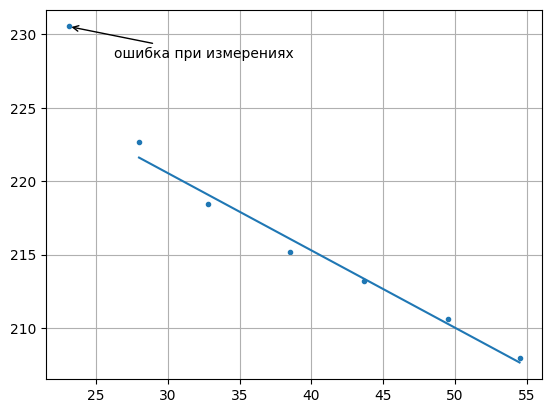

In [125]:
plt.scatter(Ts, delta_ps, marker='.')

plt.annotate('ошибка при измерениях',
            xy=(Ts[0], delta_ps[0]),
            xytext=(0.50, 0.9), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", facecolor='black'),
            horizontalalignment='right', verticalalignment='top')

k, b, kerr, berr = LeastSquares (Ts[1:], delta_ps[1:])
x = np.array([min(Ts[1:]), max(Ts[1:])])
plt.plot(x, k * x + b)
plt.grid(visible=True)
plt.show()